# Decision Tree on Amzon Fine Food Review

# Amazon Fine Food Review is about the reviews of customers on the food.

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059

# Attribute information:
 
1) Id: Number of rows

2) ProductId: Unique ID of product 

3) UserId: User identification number

4) ProfileName: User name

5) HelpfulnessNumerator: Number of user found the review helpful

6) HelpfulnessDenominator: Number of user who found the review helpful or not

7) Score: Rating given to the product

8) Time: Timestamp at the time of review posted

9) Summary: Short version of text review

10) Text: Detailed text review

# Objective:

We need to find if the review is positive (1) or negative (0).

We are provided with the score from 1 to 5. Let's assume score 1 & 2 are negative and score 4 & 5 are positive. We are ignoring 3 as it can be considered as neutral.

# Loading Dataset

In [233]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

# warnings library is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [234]:
# from google.colab import drive
# drive.mount('/content/drive')


In [235]:
# Importing dataset

# df = pd.read_csv('drive/My Drive/Reviews.csv')

# Displaying first 5 rows
# df.head()

In [237]:
# Importing dataset

df = pd.read_csv('Reviews.csv')

# Displaying first 5 rows
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

# Data Information

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [239]:
print('Number of columns:' + ' ' + str(len(df.columns)))
print('Number of rows:' + ' ' + str(df['Id'].nunique()))
print('Number of reviews:' + ' ' + str(df['Id'].nunique()))
print('Number of products:' + ' ' + str(df['ProductId'].nunique()))
print('Number of users:' + ' ' + str(df['UserId'].nunique()))

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059


# Assign Polarity

Let us assign positive (1) to the score 4 and 5

Let us assign negative (0) to the score 1 and 2

Let us ignore score having 3

In [240]:
# Let us first create a new dataset which doesn't have score 3 and it's respective rows.

print('Number of rows before removing score 3:' + ' ' + str(df['Id'].nunique()))

df_score = df[df['Score'] != 3]

print('Number of rows after removing score 3:' + ' ' + str(df_score['Id'].nunique()))

Number of rows before removing score 3: 568454
Number of rows after removing score 3: 525814


In [241]:
# Defining a function to assign polarity.

def scr(sc):
    if sc > 3:
        return 1
    return 0

In [242]:
# Calling function to assign polarity using .apply()
df_score['Score'] = df_score['Score'].apply(scr)

print("Number of positive (1) and negative (0) reviews")

df_score['Score'].value_counts()

Number of positive (1) and negative (0) reviews


1    443777
0     82037
Name: Score, dtype: int64

# Exploratory Data Analysis

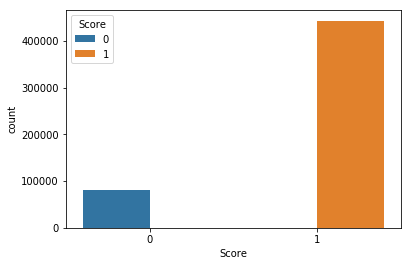

In [243]:
sns.countplot(df_score['Score'], hue = df_score['Score'])

# Observation:

As we can see, number of negative reviews are closer to 10k while positive review is more than 400k.

Ratio of negative and positive review can be assumed to be ~ 1:4.

Also, we can conclude that ~90% of the reviews are positive.

# Data Cleaning:

We have performed few techniques to clean the text and summary data

1) Null values removed

2) Duplicates removed

3) URL links removed

4) HTML tags removed

5) Stopwords removed

6) Stem words obtained

7) Converted from short form word to long form word

We have already performed above data clearning technique and saved.

Importing the clean data.

In [244]:
# df_clean = pd.read_csv('drive/My Drive/Decision Tree Folder/Amazon_Final_time.csv')

df_clean = pd.read_csv('Amazon_Final_time.csv')

df_clean = df_clean.dropna()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364149 entries, 150523 to 327600
Data columns (total 12 columns):
Id                        364149 non-null int64
ProductId                 364149 non-null object
UserId                    364149 non-null object
ProfileName               364149 non-null object
HelpfulnessNumerator      364149 non-null int64
HelpfulnessDenominator    364149 non-null int64
Score                     364149 non-null int64
Time                      364149 non-null int64
Summary                   364149 non-null object
Text                      364149 non-null object
Clean_Text                364149 non-null object
Clean_Summary             364149 non-null object
dtypes: int64(5), object(7)
memory usage: 36.1+ MB


In [245]:
df_clean = pd.read_csv('Amazon_Final_time.csv')

df_clean = df_clean.dropna()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364149 entries, 150523 to 327600
Data columns (total 12 columns):
Id                        364149 non-null int64
ProductId                 364149 non-null object
UserId                    364149 non-null object
ProfileName               364149 non-null object
HelpfulnessNumerator      364149 non-null int64
HelpfulnessDenominator    364149 non-null int64
Score                     364149 non-null int64
Time                      364149 non-null int64
Summary                   364149 non-null object
Text                      364149 non-null object
Clean_Text                364149 non-null object
Clean_Summary             364149 non-null object
dtypes: int64(5), object(7)
memory usage: 36.1+ MB


In [246]:
percentage_red = np.round((df_clean.shape[0]/df.shape[0]),5)*100
print("Data percentage reduced to ", percentage_red)

Data percentage reduced to  64.05999999999999


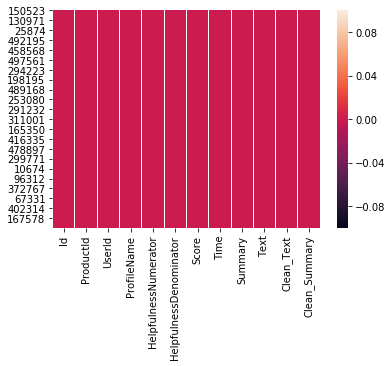

In [247]:
sns.heatmap(df_clean.isnull())

# Observation:
    
There are no null values now. We are good to go to proceed with vectorization

# 100k dataframe

Picking up random 100k samples from the dataset

In [261]:
df_100k = df_clean.sample(n = 100000)

print("Shape of sample dataframe is ", df_100k.shape)
print("Total number of rows: ", df_100k.shape[0])
print("Total number of columns: ", df_100k.shape[1])

Shape of sample dataframe is  (100000, 12)
Total number of rows:  100000
Total number of columns:  12


# Time Series Split

Since the dataset is based on time series, we need to sort based on time in an ascending order

In [262]:
df_sort_100k = df_100k.sort_values('Time', ascending = True)

In [263]:
x_100k = df_sort_100k['Clean_Text']
y_100k = df_sort_100k['Score']

print(x_100k.shape)
print(y_100k.shape)

(100000,)
(100000,)


# Defining functions 'dt' to find best hyperparameters- maximum depth and minimum sample.

In [264]:
# Defining functions 'dt' to find best hyperparameters- maximum depth and minimum sample.

# Import libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

max_dep =  [1, 5, 10, 50, 100, 500, 1000]
min_sam = [5, 10, 100, 500]

def dt(tr_x, cv_x, tr_y, cv_y, max_depth, min_sam): 
    
    ma_cv = 0
    max_dep_value_cv = 0
    min_sam_cv = 0
    
    ma_tr = 0
    max_dep_value_tr = 0
    min_sam_tr = 0
    
    auc_cv = []
    auc_tr = []
    
    # Empty list to store maximum depth and estimators to create dataframe
    c_max_dep = []
    c_min_sam = []
    
    for m in min_sam:
        
        for i in max_depth:

            # Classifier
            dt = DecisionTreeClassifier(max_depth = i, min_samples_split = m, random_state = 0)
            dt = dt.fit(tr_x, tr_y)
        
            # AUC score for CV data
            dt_pred_cv = dt.predict_proba(cv_x)[:,-1]
            dt_sc_cv = roc_auc_score(cv_y, dt_pred_cv)
            auc_cv.append(dt_sc_cv)
        
            # AUC score for train data
            dt_pred_tr = dt.predict_proba(tr_x)[:,-1]
            dt_sc_tr = roc_auc_score(tr_y, dt_pred_tr)
            auc_tr.append(dt_sc_tr)
            
            # To pick the maximum depth and minimum sample corresponding to maximum AUC score
            if ma_cv < dt_sc_cv:
                ma_cv = dt_sc_cv
                max_dep_value_cv = i
                min_sam_cv = m
            
            # To pick the maximum depth and minimum sample corresponding to maximum AUC score
            if ma_tr < dt_sc_tr:
                ma_tr = dt_sc_tr
                max_dep_value_tr = i
                min_sam_tr = m
                
        # Creating a dataframe which later can be used for 3d plot and/or heatmap to visualize scores.
    
            c_max_dep.append(i)
            c_min_sam.append(m)
            
    d1 = {'Maximum depth' : c_max_dep, 'Minimum sample' : c_min_sam, 'CV AUC' : auc_cv, 'Train AUC' : auc_tr}
    d_final = pd.DataFrame(data = d1, columns = ['Maximum depth', 'Minimum sample', 'CV AUC', 'Train AUC'])
        
    # max_depth and auc score of CV
    print('*'*30)
    print("Optimal values of CV")
    print('*'*30, '\n')
    print("Optimal minimum sample split of CV:", min_sam_cv)
    print("Optimal maximum depth of CV:", max_dep_value_cv)
    print("Corresponding AUC score of CV:", ma_cv, '\n')
    
    # max_depth and auc score of train
    print('*'*30)
    print("Optimal values of train")
    print('*'*30, '\n')
    print("Optimal minimum sample split of train:", min_sam_tr)
    print("Optimal maximum depth of train:", max_dep_value_tr)
    print("Corresponding AUC score of train:", ma_tr)
    
    return auc_cv, auc_tr, d_final

# Defining a function 'heat' to visual with heatmap

Referred from: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [265]:
# Defining a function 'heat' to visual with heatmap

def heat(d, max_depth, min_sample, score):
    
    d_pivot = d.pivot(max_depth, min_sample, score)
    d_heat = sns.heatmap(d_pivot, annot = True, linewidths = 2)
    plt.title("\nHeatmap for AUC score, maximum depth and minimum sample\n")
    
    return d_heat

# Defining a function 'd_plot' for 3-d plot visual

Referred from https://plot.ly/python/3d-axes/

In [266]:
# Defining a function 'd_plot' for 3-d plot visual

# import libraries

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

def d_plot(max_depth, min_sam, score, label):
    
    axis = go.Scatter3d(x = max_depth, y = min_sam, z = score, name = label)
    axis_data = [axis]

    layout = go.Layout(scene = dict( xaxis = dict(title = 'Max_depth'),
                                     yaxis = dict(title = 'Min_sample'),
                                     zaxis = dict(title = 'AUC score'),))

    fig = go.Figure(data = axis_data, layout = layout)
    offline.iplot(fig, filename = '3d-scatter-colorscale')

# Defining a function 'mod_per' to check performance model for train and test with ROC AUC curve

In [288]:
# Defining a function 'mod_per' to check performance model for train and test with ROC AUC curve
# Import libraries

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def mod_per(tr_x, te_x, tr_y, te_y, max_dep, min_sam):
    
    dt = DecisionTreeClassifier(max_depth = max_dep, min_samples_split = min_sam, random_state = 0)
    dt = dt.fit(tr_x, tr_y)
    
    # ROC AUC curve for train
    pred_p = dt.predict_proba(tr_x)[:,-1]
    tr_fpr, tr_tpr, threshold = metrics.roc_curve(tr_y, pred_p)
    tr_roc_auc_scr = auc(tr_fpr, tr_tpr)
    
    # ROC AUC curve for test
    pred_p = dt.predict_proba(te_x)[:,-1]
    te_fpr, te_tpr, threshold = metrics.roc_curve(te_y, pred_p)
    te_roc_auc_scr = auc(te_fpr, te_tpr)
    
    plt.figure(figsize = (6,4))
    
    plt.plot(tr_fpr, tr_tpr, color = 'b', label = tr_roc_auc_scr)
    plt.plot(te_fpr, te_tpr, color = 'g', label = te_roc_auc_scr)
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.legend()
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC AUC curve")
 

# Defining a function to predict test data and get the metrics

In [268]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix

def test_metric(train_x, test_x, train_y, test_y, max_dep, min_sam):
    
    # Classifier
    dt = DecisionTreeClassifier(max_depth = max_dep, min_samples_split = min_sam, random_state = 0)
    dt = dt.fit(train_x, train_y)
    
    # Prediction
    pred = dt.predict(test_x)
    
    # predict_proba_ for roc_auc_score
    pred_pro = dt.predict_proba(test_x)[:,-1]
    
    # Getting metrics
    print("Metric scores of test data")
    print('*'*25, '\n')
    
    roc_auc = np.round(roc_auc_score(test_y, pred_pro),3)
    print("ROC AUC score: ", roc_auc, '\n')
    print('*'*25, '\n')
    
    precision = np.round(precision_score(test_y, pred),3)
    print("Precision score: ", precision, '\n')
    print('*'*25, '\n')
    
    f1 = np.round(f1_score(test_y, pred),3)
    print("F1 score: ", f1, '\n')
    print('*'*25, '\n')
    
    recall = np.round(recall_score(test_y, pred),3)
    print("Recall score: ", recall, '\n')
    print('*'*25, '\n')
    
    class_report = classification_report(test_y, pred)
    print("Classification Report:", '\n')
    print(class_report, '\n')
    print('*'*25, '\n')
    
    return roc_auc, precision, f1, recall, dt

# Defining a function 'cm' to get confusion matrix

In [269]:
# Defining a function 'cm' to get confusion matrix

def cm(t_x, t_y, t, max_dep, min_sam):
    
    # Classifier
    dt = DecisionTreeClassifier(max_depth = max_dep, min_samples_split = min_sam, random_state = 0)
    dt = dt.fit(t_x, t_y)
    
    print("\nConfusion matrix table for", t, '\n')
    pred = dt.predict(t_x)
    skplt.metrics.plot_confusion_matrix(t_y, pred)

# Split into train, cv and test set

In [270]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_100k, y_100k, random_state = 0, test_size = 0.2, shuffle = False)

# Split into train and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(x_train, y_train, random_state = 0, test_size = 0.25, shuffle = False)

In [271]:
print("Shape of x_train: ", x_tr.shape)
print("Shape of x_cv: ", x_cv.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_tr.shape)
print("Shape of y_cv: ", y_cv.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (60000,)
Shape of x_cv:  (20000,)
Shape of x_test:  (20000,)
Shape of y_train:  (60000,)
Shape of y_cv:  (20000,)
Shape of y_test:  (20000,)


# Decision Tree

# Decision Tree: Bag of Words

In [272]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
# Bi-gram
cv = CountVectorizer(ngram_range = (1,2))

# Fit and transform train data
x_tr_f = cv.fit_transform(x_tr)

# Transform cv data
x_cv_f = cv.transform(x_cv)

# Transform test data
x_test_f = cv.transform(x_test)

# Normalization

Normalization is a feature scaling technique which transforms all the data variables to the same scale or in same range i.e 0.0 to 0.1

In [273]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
x_tr_n = normalize(x_tr_f)

# Normalize train data
x_cv_n = normalize(x_cv_f)

# Normalize test data
x_test_n = normalize(x_test_f)

# Calling 'dt' function to find the optimal maximum depth and minimum sample split

In [274]:
# Calling 'dt' function to find the optimal maximum depth and minimum sample split

sc_b, st_b, df_b = dt(x_tr_n, x_cv_n, y_tr, y_cv, max_dep, min_sam)

******************************
Optimal values of CV
****************************** 

Optimal minimum sample split of CV: 500
Optimal maximum depth of CV: 50
Corresponding AUC score of CV: 0.8275045057539498 

******************************
Optimal values of train
****************************** 

Optimal minimum sample split of train: 5
Optimal maximum depth of train: 500
Corresponding AUC score of train: 0.999805177041612


# Calling 'heat' function to visualize cv AUC score with heatmap.

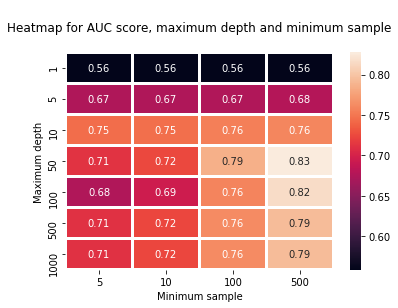

In [275]:
# Calling 'heat' function to visualize cv AUC score with heatmap.

heat(df_b, 'Maximum depth', 'Minimum sample', 'CV AUC')

# Calling 'heat' function to visualize train AUC score with heatmap.

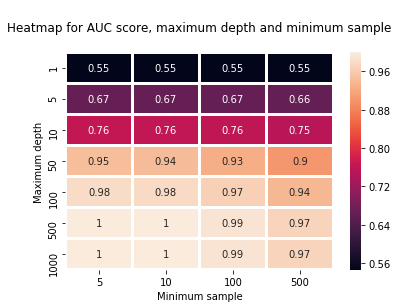

In [276]:
# Calling 'heat' function to visualize cv AUC score with heatmap.

heat(df_b, 'Maximum depth', 'Minimum sample', 'Train AUC')

# Observation:

For CV, minimum sample split is 500 and maximum depth is 50 and AUC score is 82% 

For train, minimum sample split is 5 and maximum depth is 500 and AUC score is 99%

Optimal minimum sample split: 500

Optimal maximum depth: 50

In [277]:
d_s_b = 500
d_m_b = 50

# Calling 'test_metric' function to predict test data and get metrics

minimum sample split: 500

Maximum depth: 50

In [278]:
# Calling 'test_metric' function to predict test data and get metrics
# minimum sample split: 500
# Maximum depth: 50

rab, pb, fb, reb, bow_te = test_metric(x_tr_n, x_test_n, y_tr, y_test, d_m_b, d_s_b)

Metric scores of test data
************************* 

ROC AUC score:  0.812 

************************* 

Precision score:  0.881 

************************* 

F1 score:  0.912 

************************* 

Recall score:  0.945 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.61      0.40      0.48      3510
           1       0.88      0.95      0.91     16490

   micro avg       0.85      0.85      0.85     20000
   macro avg       0.74      0.67      0.70     20000
weighted avg       0.83      0.85      0.84     20000
 

************************* 



# Calling 'cm' function to get confusion matrix for train


Confusion matrix table for train 



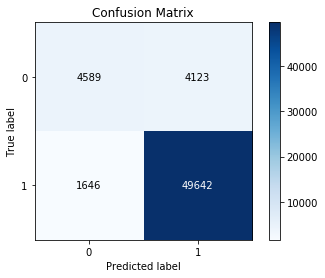

In [279]:
# Calling 'cm' function to get confusion matrix for train

cm(x_tr_n, y_tr, 'train', d_m_b, d_s_b)

# Calling 'cm' function to get confusion matrix for test


Confusion matrix table for test 



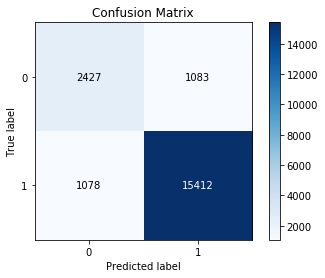

In [280]:
# Calling 'cm' function to get confusion matrix for test

cm(x_test_n, y_test, 'test', d_m_b, d_s_b)

# Calling 'mod_per' to get ROC AUC curve on train and test data

Minimum sample split: 500

Maximum depth: 50

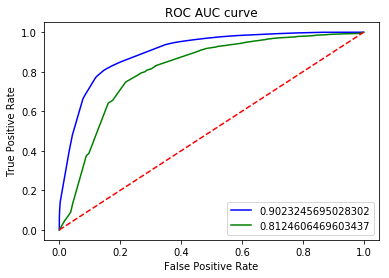

In [289]:
# Calling 'mod_per' to check model performance with ROC AUC curve on test data
# minimum sample split: 500
# Maximum depth: 50

mod_per(x_tr_n, x_test_n, y_tr, y_test, d_m_b, d_s_b)

# Observation

 - Green curve represents test curve and probabillity of separating positive and negative review is 82%.
 - Red curve represents train curve and probabillity of separating positive and negative review is 90%.

# TF-IDF: Term Frequency Inverse Document Frequency

In [290]:
# Import TfidfVectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance
tf = TfidfVectorizer()

# Fit and transform train data
x_tr_tf = tf.fit_transform(x_tr)

# Transform cv data
x_cv_tf = tf.transform(x_cv)

# Transform test data
x_test_tf = tf.transform(x_test)

# Normalization

In [291]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
x_tr_tf_n = normalize(x_tr_tf)

# Normalize cv data
x_cv_tf_n = normalize(x_cv_tf)

# Normalize test data
x_test_tf_n = normalize(x_test_tf)

# Calling 'dt' function to find maximum depth and minimum sample split.

In [292]:
# Calling 'dt' function to find maximum depth and minimum sample split.

sc_tf, st_tf, df_tf = dt(x_tr_tf_n, x_cv_tf_n, y_tr, y_cv, max_dep, min_sam)

******************************
Optimal values of CV
****************************** 

Optimal minimum sample split of CV: 500
Optimal maximum depth of CV: 50
Corresponding AUC score of CV: 0.8256011677862436 

******************************
Optimal values of train
****************************** 

Optimal minimum sample split of train: 5
Optimal maximum depth of train: 500
Corresponding AUC score of train: 0.9997125706179791


# Calling 'heat' function to visualize cv AUC score with heatmap.

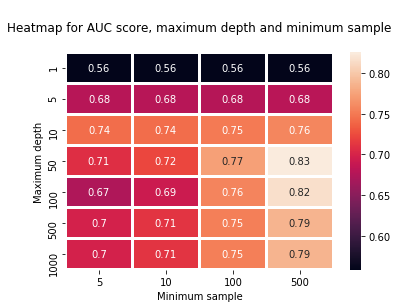

In [293]:
# Calling 'heat' function to visualize cv AUC score with heatmap.

heat(df_tf, 'Maximum depth', 'Minimum sample', 'CV AUC')

# Calling 'heat' function to visualize train AUC score with heatmap.

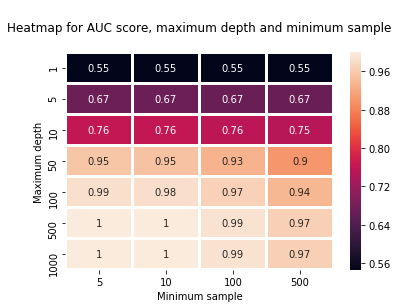

In [294]:
# Calling 'heat' function to visualize train AUC score with heatmap.

heat(df_tf, 'Maximum depth', 'Minimum sample', 'Train AUC')

# Observation:

For CV, minimum sample split is 500 and maximum depth is 50 and AUC score is 82% 

For train, n_estimators is 5 and maximum depth is 500 and AUC score is 99%

Optimal n_estimators: 500

Optimal maximum depth: 50

In [295]:
d_s_tf = 500
d_m_tf = 50

# Calling 'test_metric' function to predict test data and get the metrics

minimum sample split: 500

Maximum depth: 50

In [296]:
# Calling 'test_metric' function to predict test data and get the metrics
# minimum sample split: 500
# Maximum depth: 50

ratf, ptf, ftf, retf, tf_te = test_metric(x_tr_tf_n, x_test_tf_n, y_tr, y_test, d_m_tf, d_s_tf)

Metric scores of test data
************************* 

ROC AUC score:  0.813 

************************* 

Precision score:  0.875 

************************* 

F1 score:  0.91 

************************* 

Recall score:  0.947 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.36      0.45      3510
           1       0.88      0.95      0.91     16490

   micro avg       0.85      0.85      0.85     20000
   macro avg       0.74      0.66      0.68     20000
weighted avg       0.83      0.85      0.83     20000
 

************************* 



# Calling 'cm' function to get confusion matrix for train


Confusion matrix table for train 



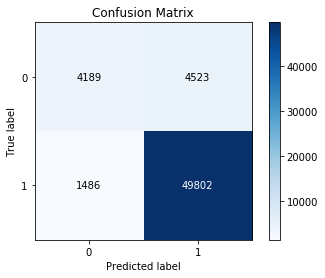

In [297]:
# Calling 'cm' function to get confusion matrix for train

cm(x_tr_tf_n, y_tr, 'train', d_m_tf, d_s_tf)

# Calling 'cm' function to get confusion matrix for test


Confusion matrix table for test 



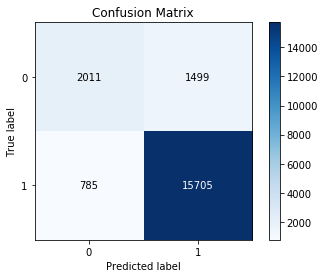

In [298]:
# Calling 'cm' function to get confusion matrix for test

cm(x_test_tf_n, y_test, 'test', d_m_tf, d_s_tf)

# Calling 'mod_per' function to check model performance on test data

minimum sample split: 500

Maximum depth: 50

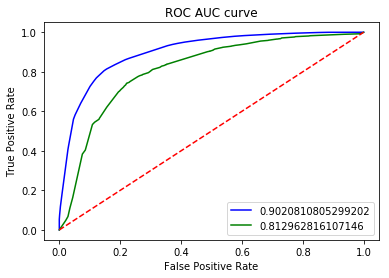

In [299]:
# Calling 'mod_per' function to check model performance on test data
# minimum sample split: 500
# Maximum depth: 50

mod_per(x_tr_tf_n, x_test_tf_n, y_tr, y_test, d_m_tf, d_s_tf)

# Observation

 - Green curve represents test curve and probabillity of separating positive and negative review is 81%.
 - Red curve represents train curve and probabillity of separating positive and negative review is 90%.

# Word2Vec

# Splitting train and test set into train and cv

In [300]:
# Splitting train and test set into train and cv

x_tr_w, x_cv_w, y_tr_w, y_cv_w = train_test_split(x_train, y_train, random_state = 0,
                                                          test_size = 0.25, shuffle = False)

In [301]:
print("Shape of x train:", x_tr_w.shape[0])
print("Shape of x cv:", x_cv_w.shape[0])
print("Shape of x test:", x_test.shape[0])
print("Shape of y train:", y_tr_w.shape[0])
print("Shape of y cv:", y_cv_w.shape[0])
print("Shape of y test:", y_test.shape[0])

Shape of x train: 60000
Shape of x cv: 20000
Shape of x test: 20000
Shape of y train: 60000
Shape of y cv: 20000
Shape of y test: 20000


# Defining a function to create Word2Vec

In [302]:
# Defining a function to create Word2Vec

def w(x_t):
    
    list_t = []
    
    for text in x_t:
        split = text.split()
        list_t.append(split)
    return list_t

# Calling function 'w' to get list of words of x_train, x_test and x_cv

In [303]:
# Calling function 'w' to get list of words of x_train, x_test and x_cv

x_tr_list = w(x_tr_w)
x_test_list = w(x_test)
x_cv_list = w(x_cv_w)

In [304]:
# Creating Word2Vec model using train data (x_train_list)

# import gensim library
import gensim

#Create an instance for the genism model
w2v_model = gensim.models.Word2Vec(x_tr_list, min_count = 5, size = 50, workers = 4)
print(w2v_model)

# Creating own corpus vocabulary
w2v_vocab = w2v_model[w2v_model.wv.vocab]
print("Shape of w2v_vocab:" + ' ' + str(w2v_vocab.shape))

# Creating list of words
w2v_word = list(w2v_model.wv.vocab)
print("Length of w2v_word:" + ' ' + str(len(w2v_word)), '\n')
print('*'*50)
print("First 10 words from the list of words w2v_word:")
w2v_word[:10]

Word2Vec(vocab=10671, size=50, alpha=0.025)
Shape of w2v_vocab: (10671, 50)
Length of w2v_word: 10671 

**************************************************
First 10 words from the list of words w2v_word:


['rememb',
 'see',
 'show',
 'air',
 'televis',
 'year',
 'ago',
 'child',
 'sister',
 'later']

In [305]:
# Let's check the most similar words

w2v_model.wv.most_similar('happi')

[('excit', 0.7964012026786804),
 ('glad', 0.7555341720581055),
 ('thrill', 0.753199577331543),
 ('pleas', 0.7061275839805603),
 ('abl', 0.5974257588386536),
 ('struggl', 0.5663765072822571),
 ('challeng', 0.5624166131019592),
 ('difficult', 0.5621181726455688),
 ('com', 0.5598927140235901),
 ('final', 0.5436254143714905)]

# Observation:
As we can see, .most_similar gives the similar words to the input word along with the percentage of similarity

# Defining a function for Avg Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [306]:
# Defining a function for Avg Word2Vec

def sent(word_list):

    sentence = [] # avg w2v of sentence/review will be stored in the empty list

    for sen in word_list:
        zero = np.zeros(50)  # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        count_div = 0         # Increases by 1 every iteration and divides the w2v the sum of w2v sentence/review
        for word in sen:
            if word in w2v_word:
                vec = w2v_model.wv[word]  # Gets the w2v for each word in a sentence/review
                zero += vec              # Sums the w2v of each word in a sentence/review at every iteration
                count_div += 1           # Increases by 1 at every iteration
        if count_div != 0:
            zero /= count_div            # w2v of sentence/review is divided by total number of words in a sentence/review (average w2v)
        sentence.append(zero)            # Stores all the avg w2z in an empty list sentence
    
    return sentence

# Average Word2Vec- Calling 'sent' function to get Avg Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [307]:
# Calling 'sent' function to get Avg Word2Vec

# Avg Word2Vec for train
x_tr_avg_w2v = sent(x_tr_list)

# Avg Word2Vec for cv
x_cv_avg_w2v = sent(x_cv_list)

# Avg Word2Vec for test
x_test_avg_w2v = sent(x_test_list)

# Normalization

In [308]:
# Normalize train data
x_tr_avg_n = normalize(x_tr_avg_w2v)
print("Shape of normalized train Avg Word2Vec:" + ' ' + str(len(x_tr_avg_n)))

# Normalize cv data
x_cv_avg_n = normalize(x_cv_avg_w2v)
print("Shape of normalized cv Avg Word2Vec:" + ' ' + str(len(x_cv_avg_n)))

# Normalize test data
x_test_avg_n = normalize(x_test_avg_w2v)
print("Shape of normalized Avg Word2Vec:" + ' ' + str(len(x_test_avg_n)))

Shape of normalized train Avg Word2Vec: 60000
Shape of normalized cv Avg Word2Vec: 20000
Shape of normalized Avg Word2Vec: 20000


# Calling 'rfi' function to find n_estimators and maximum depth

In [309]:
# Calling 'rfi' function to find n_estimators and maximum depth

sc_avg, st_avg, df_avg = dt(x_tr_avg_n, x_cv_avg_n, y_tr_w, y_cv_w, max_dep, min_sam)

******************************
Optimal values of CV
****************************** 

Optimal minimum sample split of CV: 500
Optimal maximum depth of CV: 10
Corresponding AUC score of CV: 0.8035316915508633 

******************************
Optimal values of train
****************************** 

Optimal minimum sample split of train: 5
Optimal maximum depth of train: 50
Corresponding AUC score of train: 0.9995486504109601


# Calling 'heat' function to visualize cv AUC score with heatmap.

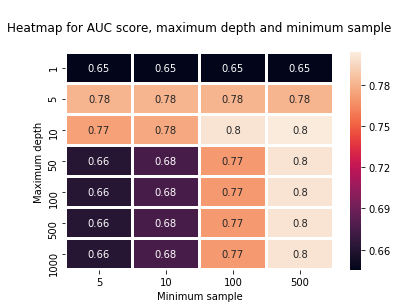

In [310]:
# Calling 'heat' function to visualize cv AUC score with heatmap.

heat(df_avg, 'Maximum depth', 'Minimum sample', 'CV AUC')

# Calling 'heat' function to visualize train AUC score with heatmap.

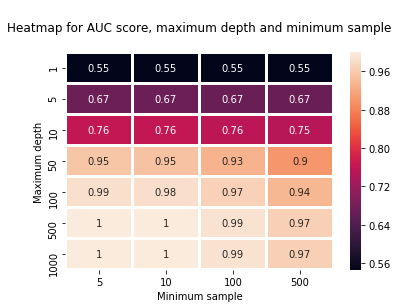

In [311]:
# Calling 'heat' function to visualize train AUC score with heatmap.

heat(df_tf, 'Maximum depth', 'Minimum sample', 'Train AUC')

# Observation:

For CV, n_estimators is 500, maximum depth is 10 and AUC score is 80%.

For train, n_estimators is 5, maximum depth is 50 and AUC score is 99%.

Optimal minimum sample split: 500

Optimal maximum depth: 10

In [312]:
d_s_avg = 500
d_m_avg = 10

# Calling 'test_metric' function to predict test data and get metrics

minimum sample split: 500

Maximum depth: 10

In [313]:
# Calling 'test_metric' function to predict test data and get metrics
# minimum sample split: 500
# Maximum depth: 10

ra_avg, p_avg, f_avg, re_avg, ea = test_metric(x_tr_avg_n, x_test_avg_n, y_tr_w, y_test, d_m_avg, d_s_avg)

Metric scores of test data
************************* 

ROC AUC score:  0.8 

************************* 

Precision score:  0.859 

************************* 

F1 score:  0.908 

************************* 

Recall score:  0.962 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.59      0.26      0.36      3510
           1       0.86      0.96      0.91     16490

   micro avg       0.84      0.84      0.84     20000
   macro avg       0.73      0.61      0.64     20000
weighted avg       0.81      0.84      0.81     20000
 

************************* 



# Calling 'mod_per' function to check model performance on train and test data.

minimum sample split: 500

Maximum depth: 10


Confusion matrix table for train 



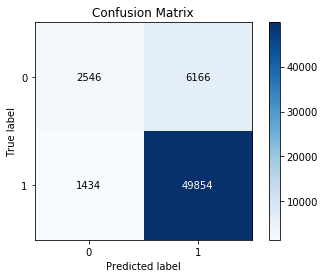

In [314]:
# Calling 'cm' function to get confusion matrix for train

cm(x_tr_avg_n, y_tr, 'train', d_m_avg, d_s_avg)

# Calling 'cm' function to get confusion matrix for test


Confusion matrix table for test 



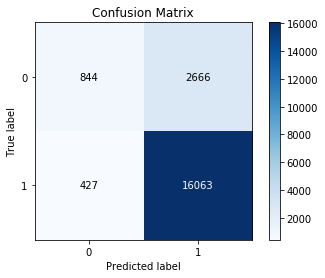

In [315]:
# Calling 'cm' function to get confusion matrix for test

cm(x_test_avg_n, y_test, 'test', d_m_avg, d_s_avg)

# Calling 'mod_per' function to check model performance on train and test data.

n_estimators: 500

Maximum depth: 10


 Model performance on test data with minimum sample split 500 maximum depth 10 



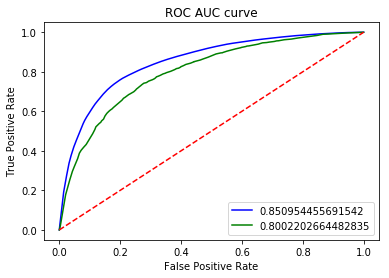

In [316]:
# Calling 'mod_per' function to check model performance on train and test data.
# n_estimators: 500
# Maximum depth: 10

print("\n Model performance on test data with minimum sample split", d_s_avg, "maximum depth", d_m_avg, "\n")

mod_per(x_tr_avg_n, x_test_avg_n, y_tr_w, y_test, d_m_avg, d_s_avg)

# Observation

 - Green curve represents test curve and probabillity of separating positive and negative review is 80%.
 - Red curve represents train curve and probabillity of separating positive and negative review is 85%.

# TF-IDF Word2Vec

In [317]:
tf_model = TfidfVectorizer()

tf_idf_tr = tf_model.fit_transform(x_tr_w)
tf_idf_cv = tf_model.transform(x_cv_w)
tf_idf_test = tf_model.transform(x_test)

# we are converting a dictionary with word as a key, and the idf as a value

dicti = dict(zip(tf_model.get_feature_names(), list(tf_model.idf_)))

# Defining a function to get TF-IDF Word2Vec

In [318]:
# Defining a function to get TF-IDF Word2Vec

def tf_w(word_list):
    tf_sentence = []   # Empty list to store the tfidf-w2v values
    for tf_sent in word_list:
        tf_zero = np.zeros(50)     # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        tf_count = 0                # Increases by tfidf value of previous tfidf value for every iteration and divides the sum of tfidf-w2v of sentence/review
        for tf_word in tf_sent:
            if tf_word in w2v_word:
                tf_vec = w2v_model.wv[tf_word]  # Get tfidf_w2v for each word in a sentence/review       
                if tf_word in dicti:
                    # tf_w2v = tf_idf_matrix[row, tf_feat.index(tf_word)]
                    tf_w2v = dicti[tf_word] * (tf_sent.count(tf_word))/len(tf_sent) 
                    tf_zero += (tf_vec * tf_w2v)    # Increase by tfidf-w2v value for every iteration
                    tf_count += tf_w2v              # Increase by ifidf value for every iteration
        if tf_count != 0:
            tf_zero /= tf_count                     # tfidf-w2v of sentence/review is divided by total number of tfidf of words in a sentence/review (tfidf-w2v)
        tf_sentence.append(tf_zero)                # Stores all the avg w2z in an empty list sentence
    
    return tf_sentence

# Calling 'tf_w' function to get TF-IDF Word2Vec

In [319]:
# Calling 'tf_w' function to get TF-IDF Word2Vec

# Avg Word2Vec for train
x_tr_tf_w2v = tf_w(x_tr_list)

# Avg Word2Vec for cv
x_cv_tf_w2v = tf_w(x_cv_list)

# Avg Word2Vec for test
x_test_tf_w2v = tf_w(x_test_list)

# Normalization

In [320]:
# Normalize train data
x_tr_tf_n = normalize(x_tr_tf_w2v)
print("Shape of normalized train TFIDF Word2Vec:" + ' ' + str(len(x_tr_tf_n)))

# Normalize cv data
x_cv_tf_n = normalize(x_cv_tf_w2v)
print("Shape of normalized cv TFIDF Word2Vec:" + ' ' + str(len(x_cv_tf_n)))

# Normalize test data
x_test_tf_n = normalize(x_test_tf_w2v)
print("Shape of normalized TFIDF Word2Vec:" + ' ' + str(len(x_test_tf_n)))

Shape of normalized train TFIDF Word2Vec: 60000
Shape of normalized cv TFIDF Word2Vec: 20000
Shape of normalized TFIDF Word2Vec: 20000


# Calling 'dt' function to find maximum depth and minimum sample split.

In [321]:
# Calling 'dt' function to find maximum depth and minimum sample split.

sc_tw, st_tw, df_tw = dt(x_tr_tf_n, x_cv_tf_n, y_tr_w, y_cv_w, max_dep, min_sam)

******************************
Optimal values of CV
****************************** 

Optimal minimum sample split of CV: 500
Optimal maximum depth of CV: 10
Corresponding AUC score of CV: 0.775172798228253 

******************************
Optimal values of train
****************************** 

Optimal minimum sample split of train: 5
Optimal maximum depth of train: 50
Corresponding AUC score of train: 0.9994614230981989


# Calling 'heat' function to visualize cv AUC score with heatmap.

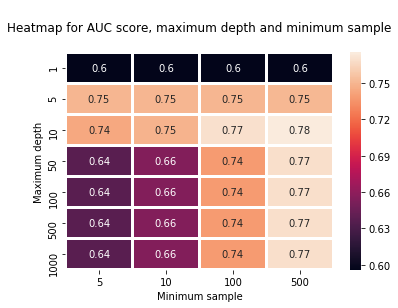

In [322]:
# Calling 'heat' function to visualize cv AUC score with heatmap.

heat(df_tw, 'Maximum depth', 'Minimum sample', 'CV AUC')

# Calling 'heat' function to visualize train AUC score with heatmap.

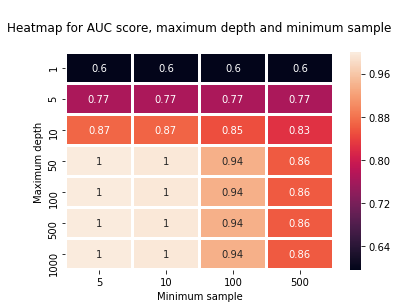

In [323]:
# Calling 'heat' function to visualize train AUC score with heatmap.

heat(df_tw, 'Maximum depth', 'Minimum sample', 'Train AUC')

# Observation:

For CV, minimum sample split is 500, maximum depth is 10 and AUC score is 77%.

For train, minimum sample split is 5, maximum depth is 50 and AUC score is 99%.

Optimal minimum sample split: 500

Optimal Maximum depth: 10


In [324]:
d_s_tw = 500
d_m_tw = 10

# Calling 'test_metric' to predict test data and get metrics

minimum sample split: 500

Maximum depth: 10

In [325]:
# Calling 'test_metric' to predict test data and get metrics
# n_estimators: 500
# Maximum depth: 10

ra_tw, p_tw, f_tw, re_tw, tq = test_metric(x_tr_tf_n, x_test_tf_n, y_tr_w, y_test, d_m_tw, d_s_tw)

Metric scores of test data
************************* 

ROC AUC score:  0.767 

************************* 

Precision score:  0.85 

************************* 

F1 score:  0.906 

************************* 

Recall score:  0.971 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.58      0.19      0.29      3510
           1       0.85      0.97      0.91     16490

   micro avg       0.83      0.83      0.83     20000
   macro avg       0.72      0.58      0.60     20000
weighted avg       0.80      0.83      0.80     20000
 

************************* 



# Calling 'cm' function to get confusion matrix for train


Confusion matrix table for train 



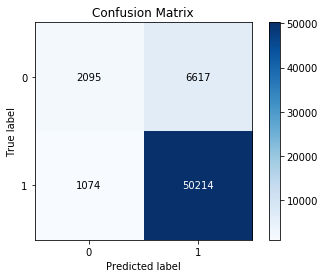

In [326]:
# Calling 'cm' function to get confusion matrix for train

cm(x_tr_tf_n, y_tr_w, 'train', d_m_b, d_s_b)

# Calling 'cm' function to get confusion matrix for test


Confusion matrix table for train 



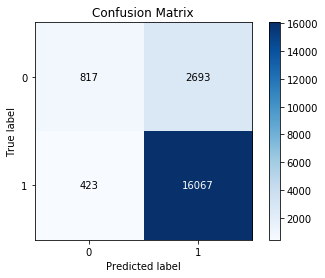

In [327]:
# Calling 'cm' function to get confusion matrix for test

cm(x_test_tf_n, y_test, 'train', d_m_b, d_s_b)

# Calling 'mod_per' function to check model performance on train and test data

minimum sample split: 500

Maximum depth: 10


 Model performance on train and cv with minimum sample split 500 and maximum depth 10 



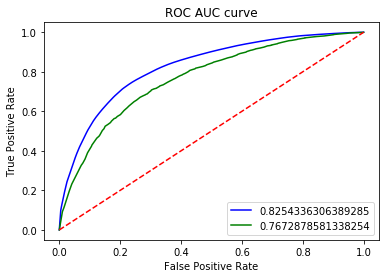

In [328]:
# Calling 'mod_per' function to check model performance on train and test data
# minimum sample split: 500
# Maximum depth: 10

print("\n Model performance on train and cv with minimum sample split", d_s_tw, "and maximum depth", d_m_tw, "\n")

mod_per(x_tr_tf_n, x_test_tf_n, y_tr_w, y_test, d_m_tw, d_s_tw)

# Observation

 - Green curve represents test curve and probabillity of separating positive and negative review is 76%.
 - Red curve represents train curve and probabillity of separating positive and negative review is 82%.

# Defining a function to get top 20 important features  

In [329]:
def top_features(vectorizer, important, n):
    
    feat = vectorizer.get_feature_names()             # Gets all the feature names from vecotrizer (BOW, TF-IDF)
    imp = important.feature_importances_               # Gets co-efficients of feature names (BOW, TF-IDF)
    fe_imp = sorted(zip(imp, feat), reverse = True)                   # Sorts and zips feature names and co-efficients correspondingly
    top_feat = fe_imp[:n]       # Zips all n number of feature names and co-efficients correspondingly
    #feat_num =  sorted(imp, reverse = True)
    
    print("Top 20 important features")
    print('-'*30)
    for (fea_1, imp_1) in top_feat:              # loop to print n number of features 
        print("%.4f\t%-15s" % (fea_1, imp_1))
    return top_feat

# Calling 'top_features' to get top 20 important featurs for BoW

In [330]:
# Calling 'top_features' to get top 20 important featurs for BoW

feat_b = top_features(cv, bow_te, 20)

Top 20 important features
------------------------------
0.0763	disappoint     
0.0487	return         
0.0448	great          
0.0428	wast money     
0.0350	worst          
0.0320	love           
0.0297	aw             
0.0283	horribl        
0.0265	best           
0.0254	terribl        
0.0226	delici         
0.0187	threw          
0.0185	bad            
0.0181	good           
0.0162	refund         
0.0138	favorit        
0.0124	unfortun       
0.0115	perfect        
0.0113	rip            
0.0103	nice           


# Calling 'top_features' to get top 20 important featurs for TFIDF

In [332]:
# Calling 'top_features' to get top 20 important featurs for TFIDF

feat_tf = top_features(tf, tf_te, 20)

Top 20 important features
------------------------------
0.0784	disappoint     
0.0515	return         
0.0491	great          
0.0386	worst          
0.0350	wast           
0.0309	love           
0.0307	best           
0.0299	horribl        
0.0289	terribl        
0.0239	delici         
0.0229	aw             
0.0197	threw          
0.0190	good           
0.0178	refund         
0.0175	bad            
0.0158	money          
0.0128	favorit        
0.0120	perfect        
0.0118	rip            
0.0103	nice           


# Defining function to get names and its weight

In [333]:
# Defining function to get names and its weight

def na_wt(feat):
    
    weights = []
    names = []
    
    for i in range(20):
        
        w = feat[i][0]
        n = feat[i][1]
        
        weights.append(w)
        names.append(n)
    
    plt.figure(figsize = (12,6))
    plt.bar(range(20), weights)
    plt.title("Top 20 important features", fontsize = 15)
    plt.xticks(range(20), labels = names, rotation = 70, fontsize = 15)

# Calling 'na_wt' to visualize top 20 important features for BoW

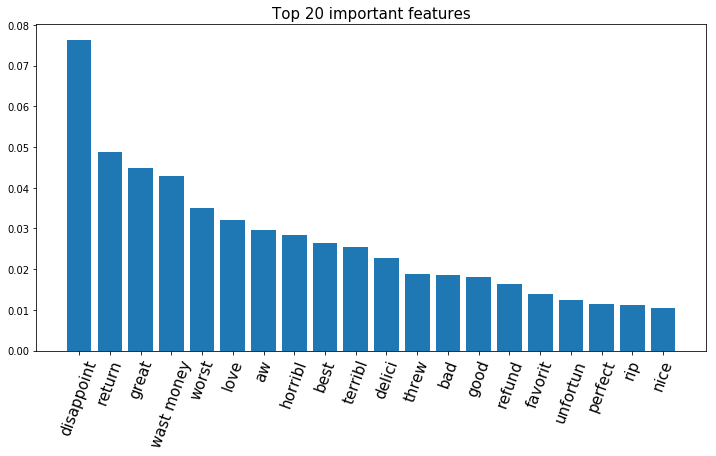

In [334]:
# Calling 'na_wt' to visualize top 20 important features for BoW

na_wt(feat_b)

# Calling 'na_wt' to visualize top 20 important features for TFIDF

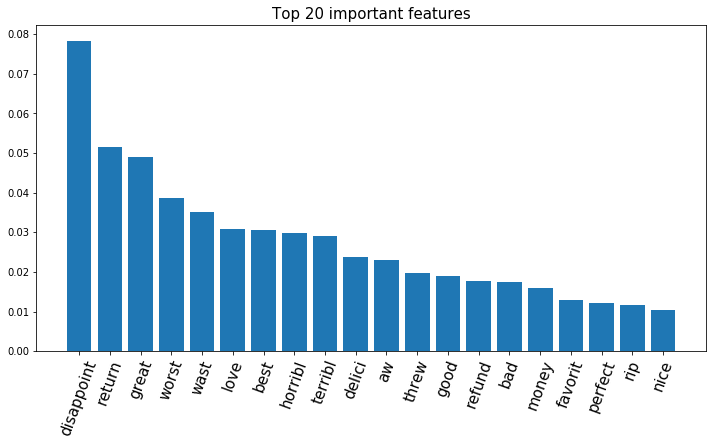

In [335]:
# Calling 'na_wt' to visualize top 20 important features for TFIDF

na_wt(feat_tf)

# Graphviz

<b>It is library which is used to visualize data in tree format.<b>

<b>Reference:
 
 - https://pythonprogramminglanguage.com/decision-tree-visual-example/ <b>
    
 - https://stackoverflow.com/questions/39956430/plotting-decision-tree-graphvizm-pydotplus <b>

# Defining a function 'grp' to get graphviz data

In [338]:
# Defining a function 'grp' to get graphviz data

# Importing required libraries
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
import collections
import pydotplus

def grp(x_t, y_t, model):
    
    dtg = DecisionTreeClassifier(max_depth = 3)
    dtg = dtg.fit(x_t, y_t)

    dtg_export = tree.export_graphviz(decision_tree = dtg, feature_names = model.get_feature_names(),
                                  out_file = None, filled = True, rounded = True)

    graph_bow = pydotplus.graph_from_dot_data(dtg_export)

    # Saves image
    # graph_bow.write_png('tree_tfidf.png')
    
    # Displays image
    return Image(graph_bow.create_png())

# Graphviz for Bag of Words

<b> Calling 'grp' function to display graphviz for Bag of Words<b>

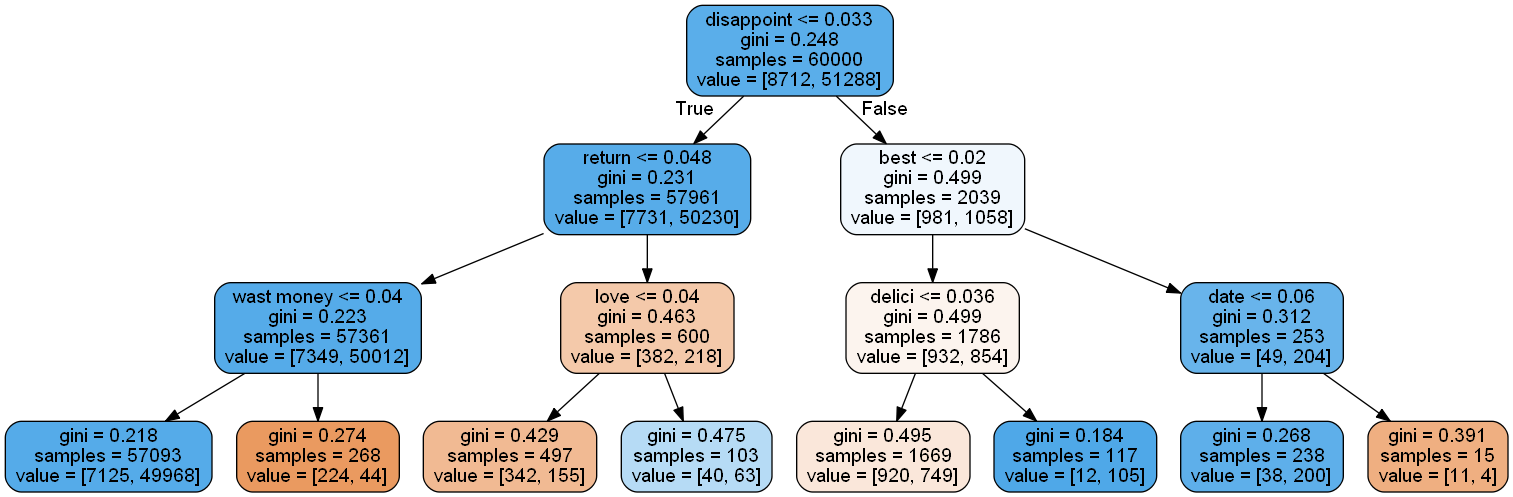

In [339]:
# Calling 'grp' function to display graphviz for Bag of Words.

grp(x_tr_n, y_tr, cv)

# Graphviz for TFIDF

<b> Calling 'grp' function to display graphviz for TFIDF<b>

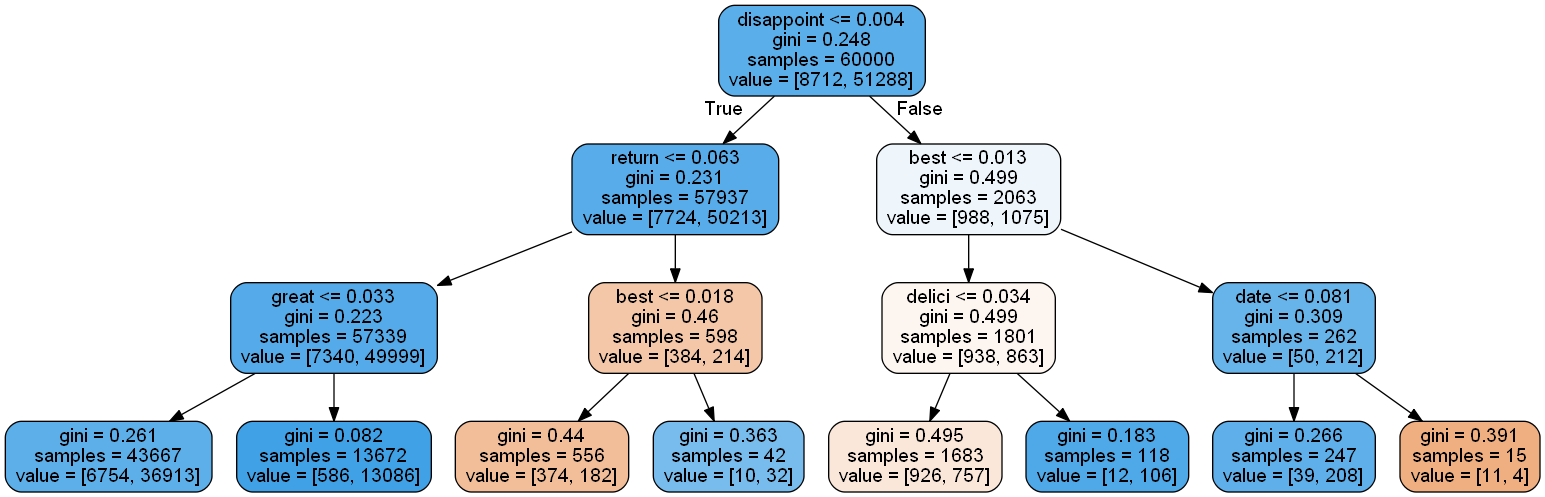

In [340]:
# Calling 'grp' function to display graphviz for TFIDF

grp(x_tr_tf, y_tr, tf)

# Pretty Table

In [341]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Vectorizer', 'Max Depth', 'Min Sample', 'ROC AUC', 'Precision', 'F1-score', 'Recall']

a.add_row([1, 'Bag of Words', d_m_b, d_s_b, rab, pb, fb, reb])
a.add_row([2, 'TF-IDF', d_m_tf, d_s_tf, ratf, ptf, ftf, retf])
a.add_row([3, 'Avg Word2Vec', d_m_avg, d_s_avg, ra_avg, p_avg, f_avg, re_avg])
a.add_row([4, 'TF-IDF Word2Vec', d_m_tw, d_s_tw, ra_tw, p_tw, f_tw, re_tw])

print()
print(a.get_string(title = 'Table for Linear SVM'))


+-------------------------------------------------------------------------------------------+
|                                    Table for Linear SVM                                   |
+------+-----------------+-----------+------------+---------+-----------+----------+--------+
| S.No |    Vectorizer   | Max Depth | Min Sample | ROC AUC | Precision | F1-score | Recall |
+------+-----------------+-----------+------------+---------+-----------+----------+--------+
|  1   |   Bag of Words  |     50    |    500     |  0.812  |   0.881   |  0.912   | 0.945  |
|  2   |      TF-IDF     |     50    |    500     |  0.813  |   0.875   |   0.91   | 0.947  |
|  3   |   Avg Word2Vec  |     10    |    500     |   0.8   |   0.859   |  0.908   | 0.962  |
|  4   | TF-IDF Word2Vec |     10    |    500     |  0.767  |    0.85   |  0.906   | 0.971  |
+------+-----------------+-----------+------------+---------+-----------+----------+--------+


# Conclusion

Highest ROC AUC score is for BoW when compared to other vectorizer. ROC AUC score being 81% with maximum depth of 50 and minimum sample of 500.

Lowest ROC AUC score is for TFIDF Word2Vec. ROC AUC score being 76% for TFIDF Word2Vec. For TFIDF Word2Vec, maximum depth is 10 and minimum sample is 500.

# Overall Conclusion:
    
We can see, BoW vectorizer resulted high ROC AUC score.

BoW can be considered as best vectorizer over other vectorizers.